In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist


In [3]:
print(mnist)

<module 'tensorflow._api.v1.keras.datasets.mnist' from '/home/aditya/anaconda3/envs/dlenv/lib/python3.6/site-packages/tensorflow/_api/v1/keras/datasets/mnist/__init__.py'>


In [4]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)


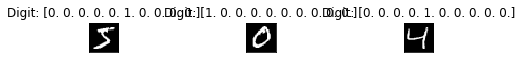

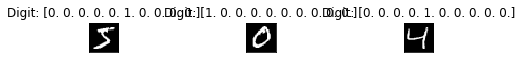

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(3):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [10]:
print(len(x_train))
print(len(y_train))

60000
60000


In [11]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train/=255
x_test/=255


In [33]:
# model = tf.keras.models.Sequential([
#   tf.keras.layers.Flatten(input_shape=(28, 28)),
#   tf.keras.layers.Dense(512, activation=tf.nn.relu),
#   tf.keras.layers.Dropout(0.2),
#   tf.keras.layers.Dense(10, activation=tf.nn.softmax)
# ])

model = tf.keras.Sequential()
# model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Conv2D(filters=6,kernel_size=(6,6),padding='same', activation ='relu',input_shape = (28,28,1)))
model.add(tf.keras.layers.Conv2D(filters=12,kernel_size=(5,5),strides=(2, 2),padding='same', activation ='relu'))
model.add(tf.keras.layers.Conv2D(filters=24,kernel_size=(4,4),strides=(2, 2),padding='same', activation ='relu'))

# model.add(tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100,activation ='relu'))
# model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(10, activation ="softmax"))

In [34]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [35]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 6)         222       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 12)        1812      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 7, 7, 24)          4632      
_________________________________________________________________
flatten_4 (Flatten)          (None, 1176)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               117700    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1010      
Total params: 125,376
Trainable params: 125,376
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)


Epoch 1/5
60000/60000 [==============================] - 51s 847us/step - loss: 0.5084 - acc: 0.8315
Epoch 2/5
60000/60000 [==============================] - 50s 836us/step - loss: 0.1529 - acc: 0.9536
Epoch 3/5
60000/60000 [==============================] - 50s 841us/step - loss: 0.1023 - acc: 0.9687
Epoch 4/5
60000/60000 [==============================] - 51s 847us/step - loss: 0.0787 - acc: 0.9756
Epoch 5/5
10000/10000 [==============================] - 3s 333us/step


[0.059516250972542914, 0.9796]